# Resonant Tunneling
## Advanced Quantum Mechanics Lab



**Relevant Imports**

In [6]:
import math
import numpy as np

import matplotlib.pyplot as plt


**Variable declaration**

In [7]:
# Define imaginary unit
i = 1j

# Define constants
me = 9.1093837e-31              # [Kg]
qe = 1.60217663e-19             # [C]
hbar = 1.054571817e-34          # [J*s]
hbar_ = hbar*qe                 # [eV*s]

**Propagation constants**

In [8]:
# For E - V > 0 
def k(E, V, m):
    return np.sqrt(2*m*(E-V))/hbar

# For E - V < 0
def chi(E, V, m):
    return np.sqrt(2*m*(V-E))/hbar

**Analytical expression of Transmission Coefficient**

In [9]:
# First, function to compute the K term

def K(k1, k3, k5, x2, x4, w2, w3, w4):
    
    # Compute phi's before
    phi_1 = k3*w3
    phi_2 = np.arctan(x2/k1)
    phi_3 = np.arctan(x2/k3)
    phi_4 = np.arctan(x4/k3)
    phi_5 = np.arctan(x4/k5)
  
    # Compute the K term
    return np.exp(x2 * w2 + x4 * w4) * (np.exp(i * (- phi_1 + phi_2 + phi_3 + phi_4 + phi_5)) - np.exp(i * (phi_1 + phi_2 - phi_3 - phi_4 + phi_5))) \
        + np.exp(x2 * w2 - x4 * w4) * (- np.exp(i * (- phi_1 + phi_2 + phi_3 - phi_4 - phi_5)) + np.exp(i * (phi_1 + phi_2 - phi_3 + phi_4 - phi_5))) \
        + np.exp(- x2 * w2 + x4 * w4) * (- np.exp(i * (- phi_1 - phi_2 - phi_3 + phi_4 + phi_5)) + np.exp(i * (phi_1 - phi_2 + phi_3 - phi_4 + phi_5))) \
        + np.exp(- x2 * w2 - x4 * w4) * (- np.exp(i * (- phi_1 - phi_2 - phi_3 - phi_4 - phi_5)) + np.exp(i * (phi_1 - phi_2 + phi_3 + phi_4 - phi_5)))


# Use it to compute Transmission Coeff.

def T(k1, k3, k5, x2, x4, w2, w3, w4):
    # Compute the K term for T
    K_term = K(k1, k3, k5, x2, x4, w2, w3, w4)

    # Output T
    return (((2 ** 8) * k1 * k5 * (x2 * k3 * x4)**2 ) / (abs(K_term)**2)) / ((k1**2 + x2**2) * (x2**2 + k3**2) * (k3**2 + x4**2) * (x4**2 + k5**2))


## 1. Transmission of a symmetric double barrier

**Exercise 1:**
Find the transmission coefficient of a symmetric double barrier and the bound states of the double barrier well. 

<function matplotlib.pyplot.show(close=None, block=None)>

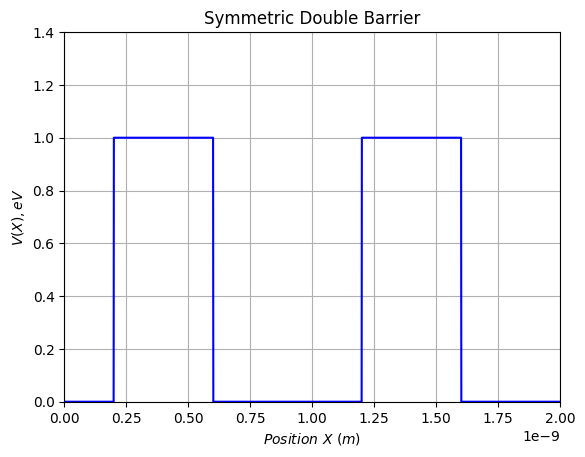

In [48]:
# Create our potential barrier, based on Fig. 9 from the guide.

def V(x):
    if (x < 0.2e-9) or (0.6e-9 < x < 1.2e-9) or (x > 1.6e-9):
        return 0
    else:
        return 1
    
# Plot it as in Fig. 8
# Create and assign arrays
x  = np.arange(0e-9, 2e-9, 0.001e-9)
V_x = [V(i) for i in x]

plt.plot(x, V_x, color='blue')
plt.xlabel('$Position \ X \ (m)$')
plt.ylabel('$V(X), eV$')
plt.title('Symmetric Double Barrier')
plt.ylim(0, 1.4)
plt.xlim(0e-9, 2e-9)
plt.grid()
plt.show

**Exercise 2:** Represent in a graph the transmission coefficient and obtain the resonance energies.

The resonant energy is: 0.35850000000000015 eV, with a transmission coefficient of: 0.977697064080878


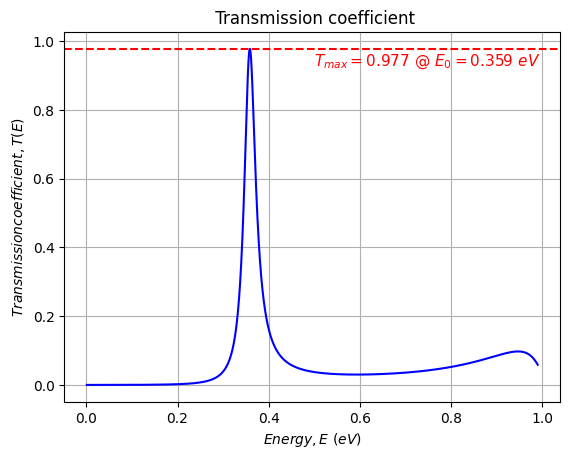

In [47]:

# Array that stores the range of energies of study
Energies = np.arange(0.001, 0.99, 0.0001)


# Compute the transmission coefficient for each energy
def T_for_E(E):
    energy = E*1.6e-19
    k1 = k3 = k5 = k(energy, 0, me)
    x2 = x4 = chi(energy, 1.6e-19, me)
    w2 = w4 = 0.4e-9
    w3 = 0.6e-9

    # Compute the tranmission coeff. for the set values
    return T(k1, k3, k5, x2, x4, w2, w3, w4)

# Use the f to fill the array of trans.coeffs
Trans_coeffs = np.array(tuple(T_for_E(energy) for energy in Energies))

# The resonant energy will correspond to highest T
T_max = Trans_coeffs.max()
res_energy = Energies[np.argmax(Trans_coeffs)]
print('The resonant energy is: ' +  str(res_energy) + ' eV, with a transmission coefficient of: ' + str(T_max))


# Plot everything
plt.plot(Energies, Trans_coeffs, label='T(E)', color='blue')
plt.title("Transmission coefficient")
plt.xlabel('$Energy, E \ (eV)$')
plt.ylabel('$Transmission coefficient, T(E)$')
plt.axhline(y = max(Trans_coeffs), color = 'r', linestyle = '--')
plt.text(0.5, 0.93, '$T_{max} = 0.977 \ @ \  E_{0} = 0.359 \ eV$', color = 'r', fontsize = 11)
plt.grid()
plt.show()




## 2. Transmission of an asymmetric double barrier

**Exercise 1:** Repeat 1.1 with an asymmetric double barrier following the parameters in Fig.9 from the guide.

<function matplotlib.pyplot.show(close=None, block=None)>

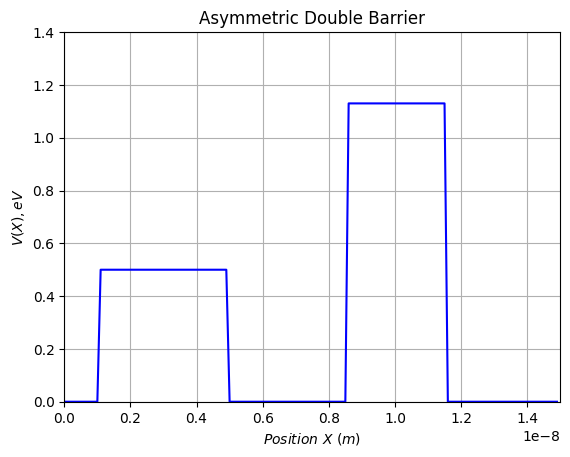

In [117]:
# Redefine the potential double barrier
def V(x):
    if (x <= 1e-9) or (5e-9 <= x <= 8.6e-9) or (x >= 11.6e-9):
        return 0
    elif (1e-9 < x < 5e-9):
        return 0.5
    elif (8.6e-9 < x < 11.6e-9):
        return 1.13


# Plot it as in Fig. 9
# Create and assign arrays
x  = np.arange(0e-9, 15e-9, 0.1e-9)
V_x = [V(i) for i in x]

plt.plot(x, V_x, color='blue')
plt.xlabel('$Position \ X \ (m)$')
plt.ylabel('$V(X), eV$')
plt.title('Asymmetric Double Barrier')

plt.ylim(0, 1.4)
plt.xlim(0e-9, 15e-9)
plt.grid()
plt.show   


C:\Users\Usuario\AppData\Local\Temp\ipykernel_20840\4006845478.py:7: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(2*m*(V-E))/hbar


The resonant energy is: 0.5000000000000002 eV, with a transmission coefficient of: 0.3250585803652236


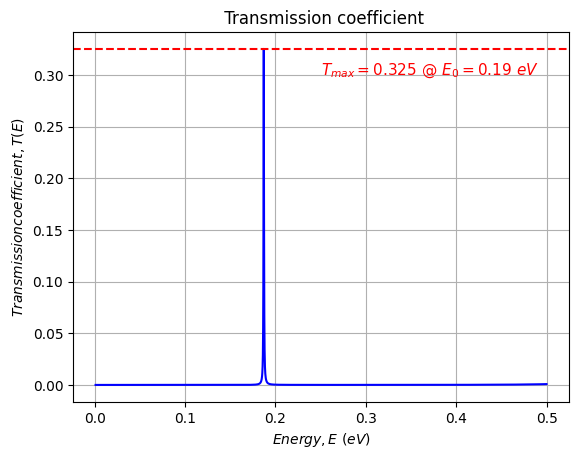

In [125]:
# Array that stores the range of energies of study
Energies = np.arange(0.001, 1.99, 0.0001)

# Compute the transmission coefficient for each energy
def T_for_E(E):
    energy = E*1.6e-19
    m = 0.067*me
    k1 = k3 = k5 = k(energy, 0, m)
    x2 = chi(energy, 0.5*1.6e-19, m)
    x4 = chi(energy, 1.13*1.6e-19, m)
    w2 = 4e-9
    w3 = 3.6e-9
    w4 = 3e-9

    # Compute the tranmission coeff. for the set values
    return T(k1, k3, k5, x2, x4, w2, w3, w4)

# Use the f to fill the array of trans.coeffs
Trans_coeffs = np.array(tuple(T_for_E(energy) for energy in Energies))

# The resonant energy will correspond to highest T
T_max = max(Trans_coeffs)
res_energy = Energies[np.argmax(Trans_coeffs)]
print('The resonant energy is: ' +  str(res_energy) + ' eV, with a transmission coefficient of: ' + str(T_max))


# Plot everything
plt.plot(Energies, Trans_coeffs, label='T(E)', color='blue')
plt.title(" Transmission coefficient")
plt.xlabel('$Energy, E \ (eV)$')
plt.ylabel('$Transmission coefficient, T(E)$')
plt.axhline(y = max(Trans_coeffs), color = 'r', linestyle = '--')
plt.text(0.25, 0.30, '$T_{max} = 0.325 \ @ \  E_{0} = 0.19 \ eV$', color = 'r', fontsize = 11)
plt.grid()
plt.show()

**Exercise 2:** Repeat 1.2 with an asymmetric double barrier following the parameters in Fig.10 from the guide.

<function matplotlib.pyplot.show(close=None, block=None)>

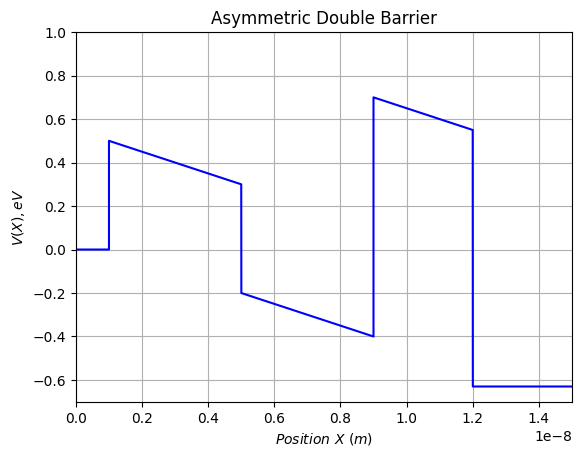

In [115]:
# Redefine (again) the potential double barrier
def V(x):
    if (x <= 1e-9):
        return 0
    elif (1e-9 < x <= 5e-9):
        return 0.5+(0.2/(4e-9))*1e-9 - (0.2/(4e-9))*x
    elif (5e-9 < x <= 9e-9) :
        return -0.2+(0.2/(4e-9))*5e-9 - (0.2/(4e-9))*x 
    elif (9e-9 < x <= 12e-9):
        return 0.7+(0.2/(4e-9))*9e-9 - (0.2/(4e-9))*x
    elif (x > 12e-9):
        return -0.63
    


# Plot it as in Fig. 9
# Create and assign arrays
x  = np.arange(0e-9, 15e-9, 0.0001e-9)
V_x = [V(i) for i in x]

plt.plot(x, V_x, color='blue')
plt.xlabel('$Position \ X \ (m)$')
plt.ylabel('$V(X), eV$')
plt.title('Asymmetric Double Barrier')
plt.ylim(-0.7, 1)
plt.xlim(0e-9, 15e-9)
plt.grid()
plt.show   


C:\Users\Usuario\AppData\Local\Temp\ipykernel_20840\4006845478.py:7: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(2*m*(V-E))/hbar


The resonant energy is: 0.4000000000000002 eV, with a transmission coefficient of: 0.7993523061433375


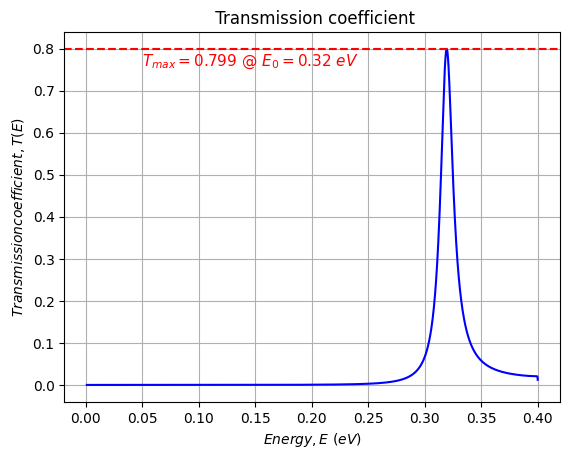

In [128]:
# Compute the transmission coefficient and plot it
 # Again, array that stores the range of energies of study
Energies = np.arange(0.001, 1.99, 0.0001)

# Compute the transmission coefficient for each energy
def T_for_E(E):
    # Similarly to 2.1
    energy = E*1.6e-19
    m = 0.067*me

    k1 = k(energy, 0, m)
    k3 = k(energy, -0.4*1.6e-19, m)
    k5 = k(energy, -0.6*1.6e-19, m)
    x2 = chi(energy, 0.4*1.6e-19, m)
    x4 = chi(energy, 0.6*1.6e-19, m)
    w2 = 4e-9
    w3 = 3.6e-9
    w4 = 3e-9

    # Compute the tranmission coeff. for the set values
    return T(k1, k3, k5, x2, x4, w2, w3, w4)

# Use the f to fill the array of trans.coeffs
Trans_coeffs = np.array(tuple(T_for_E(energy) for energy in Energies))

# The resonant energy will correspond to highest T
T_max = max(Trans_coeffs)
res_energy = Energies[np.argmax(Trans_coeffs)]
print('The resonant energy is: ' +  str(res_energy) + ' eV, with a transmission coefficient of: ' + str(T_max))


# Plot everything
plt.plot(Energies, Trans_coeffs, label='T(E)', color='blue')
plt.title(" Transmission coefficient")
plt.xlabel('$Energy, E \ (eV)$')
plt.ylabel('$Transmission coefficient, T(E)$')
plt.axhline(y = max(Trans_coeffs), color = 'r', linestyle = '--')
plt.text(0.05, 0.76, '$T_{max} = 0.799 \ @ \  E_{0} = 0.32 \ eV$', color = 'r', fontsize = 11)

plt.grid()
plt.show()